<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_13_terver/HW_13_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET DESCRIPTION

**world_rank** - world rank for the university  
**university_name** - name of university  
**country** - country of each university  
**teaching** - university score for teaching (the learning environment)  
**international** - university score international outlook (staff, students, research)  
**research** - university score for research (volume, income and reputation)  
**citations** - university score for citations (research influence)  
**income** - university score for industry income (knowledge transfer)  
**total_score** - total score for university, used to determine rank  
**num_students** - number of students at the university  
**student_staff_ratio** - number of students divided by number of staff  
**international_students** - percentage of students who are international  
**female_male_ratio** - Female student to Male student ratio  
**year** - year of the ranking  


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/julika333/TMS-DS.git
!cp -r TMS-DS/lesson_13_terver/timesData.csv .
!rm -rf TMS-DS
df = pd.read_csv("timesData.csv")
print(df.shape)
df.info()


Cloning into 'TMS-DS'...
remote: Enumerating objects: 174, done.
remote: Total 174 (delta 0), reused 0 (delta 0), pack-reused 174
Receiving objects: 100% (174/174), 19.07 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (54/54), done.
(2603, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student

In [69]:
df.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


# **Начинаем преобразовывать столбцы в нормальный вид**
### 1) world_rank содержит числа, строки типа интервалов и значения со знаком =
### 2) столбцы international и income содержат значения '-'
### 3) столбец num_students содержит в качестве разделителя тысячных ','
### 4) international_students - уберем знак процента, преобразуем в целое число
### 5) столбуц female_male_ratio разобьем на 2 с учетом количества студентов. если соотношение NAN, тогда берем в расчет 50/50


In [5]:
# Начинаем преобразовывать столбцы в нормальный вид
unique_world_rank	= df["world_rank"].unique()
unique_world_rank

array(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '109', '111', '112', '114', '115', '117', '118', '119',
       '120', '122', '124', '127', '128', '129', '130', '132', '135',
       '136', '137', '138', '139', '140', '142', '143', '144', '145',
       '147', '149', '151', '152', '155', '156', '158', '159', '161',
       '163', '164', '165', '167', '168', '170', '171', '172', '173',
       '174', '177', '178', '181', '182', '183', '184', '185', '186

In [6]:
# Преобразуем столбец world_rank в int, 201-225 = (201+255)/2, "=113" = 113
def clean_rank(value):
    # Преобразуем диапазоны в среднее значение
    if '-' in str(value):
        start, end = map(int, value.split('-'))
        return (start + end) // 2
    # Убираем знак = и конвертируем в число
    elif '=' in str(value):
        return int(value.strip('='))
    # В остальных случаях просто конвертируем в число
    return int(value)


df['world_rank'] = df['world_rank'].apply(clean_rank)
unique_world_rank	= df["world_rank"].unique()
unique_world_rank

array([  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,
        15,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  47,  48,  49,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  63,  64,  65,  66,  67,  68,  71,  72,  73,  75,  76,
        77,  78,  79,  81,  83,  85,  86,  87,  88,  89,  90,  93,  94,
        95,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 111,
       112, 114, 115, 117, 118, 119, 120, 122, 124, 127, 128, 129, 130,
       132, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 147, 149,
       151, 152, 155, 156, 158, 159, 161, 163, 164, 165, 167, 168, 170,
       171, 172, 173, 174, 177, 178, 181, 182, 183, 184, 185, 186, 187,
       189, 190, 193, 195, 196, 197, 199,   7,  16,  31,  44,  45,  46,
        62,  69,  70,  74,  80,  84,  91,  92,  96,  97, 108, 110, 113,
       116, 121, 123, 125, 131, 133, 134, 141, 146, 148, 150, 15

In [32]:
# df.info()
# исключаем строки, в которых значения = "-". Не знаем на что правильно заменить, значить исключим
# international = -9 штук , и переводим в float
df_filter_01 = df.copy()
df_filter_01 = df_filter_01[df_filter_01["international"] != '-']
df_filter_01["international"] =  df_filter_01["international"].astype("float")

In [96]:
# ВСе записи с income = '-' временно перенесем в отдельный датасет, потом решим, что с ним делать (-214 таких).
# также income и num_students преобразуем тип в float
df_no_income = df_filter_01[df_filter_01["income"] == '-']
df_filter_02 = df_filter_01.copy()
df_filter_02 = df_filter_02[df_filter_02["income"] != '-']
df_filter_02["income"] = df_filter_02["income"].astype("float")

# удалим строки, где international_students не определено.
df_filter_02 = df_filter_02[df_filter_02["international_students"].notna()]
df_filter_02["international_students_percent"] = df_filter_02["international_students"].replace('%', '', regex=True).astype("int")

df_filter_02["num_students"] = df_filter_02["num_students"].replace(',', '', regex=True).astype("int")
#female_male_ratio
df_filter_02["num_female"] = round(df_filter_02["female_male_ratio"].apply(lambda x: int(str(x).split(' : ')[0])/100 if pd.notna(x) and x != '-' else 0.5) * df_filter_02["num_students"], 0).astype("int")
df_filter_02["num_male"] = df_filter_02["num_students"] - df_filter_02["num_female"]


In [98]:
df_final = df_filter_02[["world_rank", "university_name",	"country",	"teaching",	"international",	"research",	"citations",	"income",	"num_students",	"student_staff_ratio",	"international_students_percent",	"num_female", "num_male",	"year"]]
df_final.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students_percent,num_female,num_male,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,20152,8.9,25,10076,10076,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,2243,6.9,27,740,1503,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,11074,9.0,33,4097,6977,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,15596,7.8,22,6550,9046,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,18812,11.8,34,8654,10158,2011


<ipython-input-106-59c826206613>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), vmin = -1, annot= True, cmap='coolwarm')


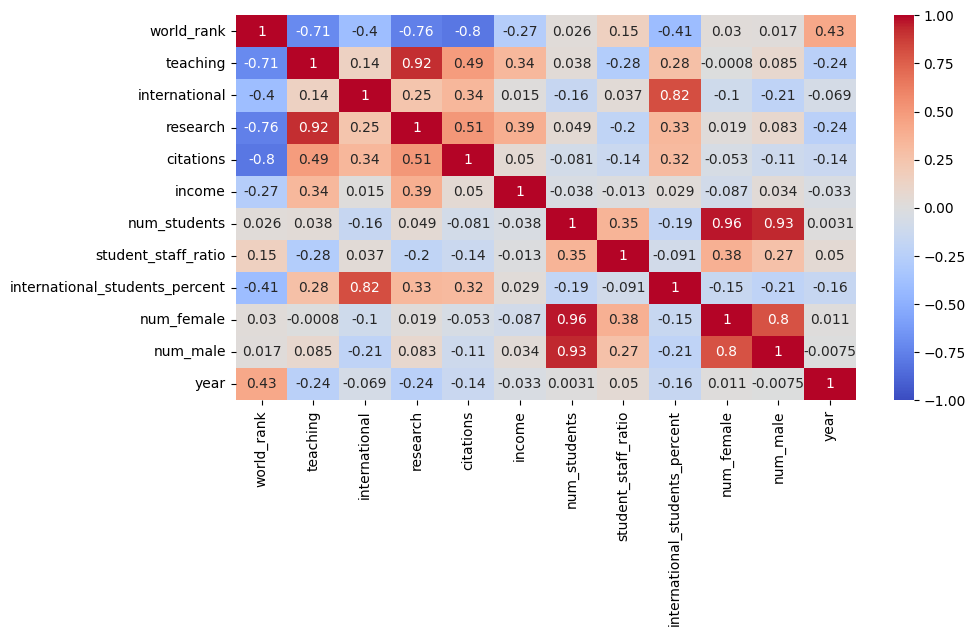

In [106]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(df_final.corr(), vmin = -1, annot= True, cmap='coolwarm')
plt.show()